#Análise Exploratória em Conjunto de Dados do [Kaggle](https://www.kaggle.com/)
# Análise 4

In [1]:
# Imports

import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import __version__
import matplotlib.pyplot as plt 
from datetime import datetime

sns.set(style='white')

%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
# Matplotlib version
__version__

'3.2.2'

In [4]:
sns.__version__

'0.11.2'

###Carregando Dataset

In [5]:
# Creating Dataframe

df = pd.read_csv('autos.csv', encoding='utf-8')
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Offer,650,test,limousine,1995,manuell,102,3er,150000,Oct,Gasoline,bmw,Yes,2016-04-04 00:00:00,33775,2016-04-06 19:17:07,2016,2016,April,April,2,19,21,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Offer,2200,test,cabrio,2004,manuell,109,2_reihe,150000,Aug,Gasoline,peugeot,No,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,2016,2016,April,April,4,18,12,4
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Offer,0,test,limousine,1980,manuell,50,andere,40000,Jul,Gasoline,volkswagen,No,2016-03-21 00:00:00,19348,2016-03-25 16:47:58,2016,2016,March,March,4,16,36,5
8,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Offer,999,test,kleinwagen,1998,manuell,101,golf,150000,Jan,Other,volkswagen,Other,2016-03-17 00:00:00,27472,2016-03-31 17:17:06,2016,2016,March,March,14,17,18,11
9,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Offer,2000,control,limousine,2004,manuell,105,3_reihe,150000,Nov,Gasoline,mazda,No,2016-03-26 00:00:00,96224,2016-04-06 10:45:34,2016,2016,March,March,11,10,12,1


###Média do Preço por Marca e por Veículo

In [6]:
# Creating a temporary dataframe that associates the mean prices of the vehicles by brand

pd.options.display.float_format = '${:.2f}'.format
mean_price_brand_vehicle = df[['price', 'brand', 'vehicleType']]
mean_price_brand_vehicle = mean_price_brand_vehicle.groupby(by=['vehicleType', 'brand']).mean().reset_index().rename(columns={'price':'average price'})
mean_price_brand_vehicle = mean_price_brand_vehicle[['average price', 'brand', 'vehicleType']].sort_values(by='brand', ascending=False).reset_index(drop=True)
mean_price_brand_vehicle

,average price,brand,vehicleType
0,$14081.24,volvo,suv
1,$3768.01,volvo,limousine
2,$1475.00,volvo,kleinwagen
3,$2789.71,volvo,kombi
4,$5502.10,volvo,coupe
...,...,...,...
328,$5265.46,alfa_romeo,coupe
329,$962.50,alfa_romeo,andere
330,$0.00,alfa_romeo,suv
331,$3312.97,alfa_romeo,kombi


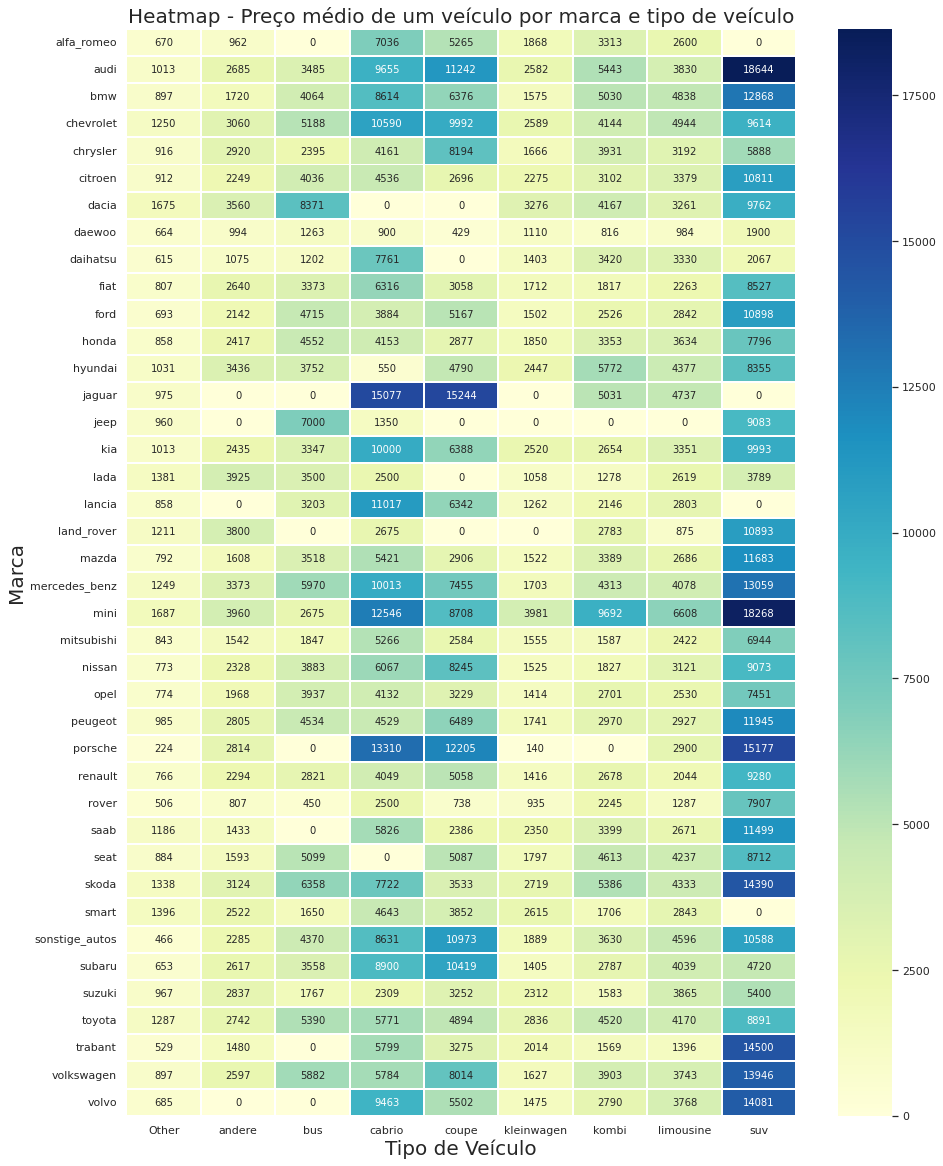

In [7]:
# Creating a Heatmap in order to show the relations

df_heatmap = mean_price_brand_vehicle.pivot(index='brand', columns='vehicleType', values='average price').fillna(0)
plt.figure(figsize=(15,20))
ax = sns.heatmap(df_heatmap, linewidths=1, annot=True, fmt='.0f', cmap='YlGnBu')
ax.set_xlabel('Tipo de Veículo', fontsize=20)
ax.set_ylabel('Marca', fontsize=20)
ax.set_title('Heatmap - Preço médio de um veículo por marca e tipo de veículo', fontsize=20)
plt.show()